# **Real Estate - EDA**


# **Table of Contents**
* [1.Import and load data](#1)
* [2.Exoloratory Visualization](#2)
  * [Check target](#2.1)
  * [Check correlation](#2.2)
* [3.Analysis](#3)
* [4. Export](#4)


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="1"></a> <br>
# **1. Imports and load data**

In [1]:
# Load data libraries
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action="ignore", category=FutureWarning)

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from scipy.stats import norm

In [2]:
# First, let's load the data
df = pd.read_csv("../data/clean/belgium_real_estate.csv")

df.head()

,postal_code,type_of_property,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,city_name,lattitude,longitude,price
0,1050,0,6,203,1,0,1,0,95,2,0,to be done up,Ixelles,4.381571,50.822285,340000
1,1050,0,4,200,0,0,0,0,69,2,0,to renovate,Ixelles,4.381571,50.822285,520000
2,1050,0,4,160,1,0,1,1,100,2,0,to be done up,Ixelles,4.381571,50.822285,599000
3,1050,0,3,160,1,0,1,1,130,2,0,good,Ixelles,4.381571,50.822285,599000
4,1050,0,3,171,0,0,0,0,46,2,0,just renovated,Ixelles,4.381571,50.822285,575000


In [3]:
df.shape

(41528, 16)

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="2"></a> <br>
# **2. Exploratory Visualization**

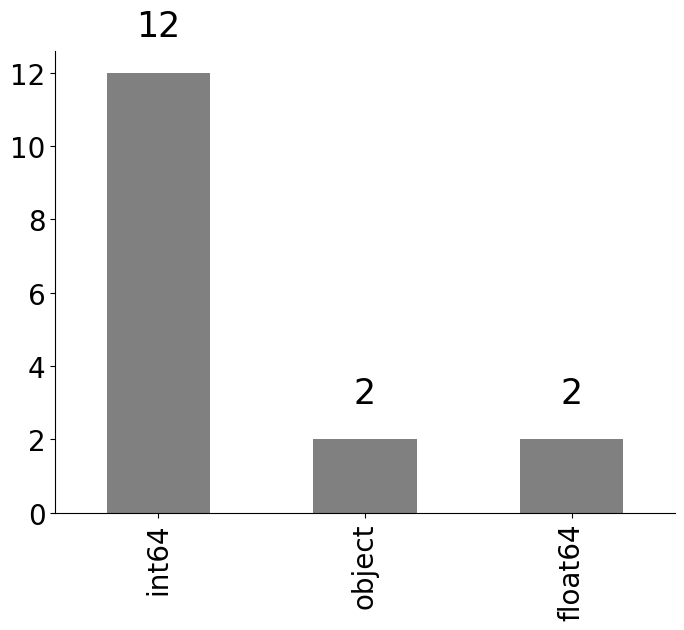

In [4]:
plt.figure(figsize=(8, 6))
ax = df.dtypes.value_counts().plot(kind="bar", grid=False, fontsize=20, color="grey")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0, height + 1, height, ha="center", size=25)
sns.despine()

Observation:

There are 17 numerical features and 6 object (string) types. Among the numeric features, 6 are int types and 11  are float types. 

<a id="2.1"></a> 
### **Check target**

The problem is a regression problem. Therefore, we analyze the distribution of the target and check whether there is necessary preprocessing based on this. If it is a classification problem We need to check target imbalance.

In [5]:
def plotting_3_chart(df, feature):
    style.use("fivethirtyeight")

    fig = plt.figure(constrained_layout=True, figsize=(15, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    # Histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Histogram")
    sns.histplot(df[feature], kde=True, ax=ax1, stat="density")
    ax1.lines[0].set_color("blue")

    # Add normal distribution curve
    mu, std = df[feature].mean(), df[feature].std()
    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax1.plot(x, p, "k", linewidth=2, label="Normal Distribution")

    # Add vertical lines for mean, median, and mode
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    mode_val = df[feature].mode().values[0]

    ax1.axvline(mean_val, color="red", linestyle="--", label="Mean")
    ax1.axvline(median_val, color="orange", linestyle="--", label="Median")
    ax1.axvline(mode_val, color="green", linestyle="--", label="Mode")
    plt.legend()

    # Probability Plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title("Probability Plot")
    stats.probplot(df.loc[:, feature], plot=ax2)

    # Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title("Box Plot")
    sns.boxplot(df.loc[:, feature], orient="v", ax=ax3)

The target variable : Distribution of Price

Skewness: 1.362451
Kurtosis: 1.885403
Mean: 315388 - Median: 275000 - Mode: 249000


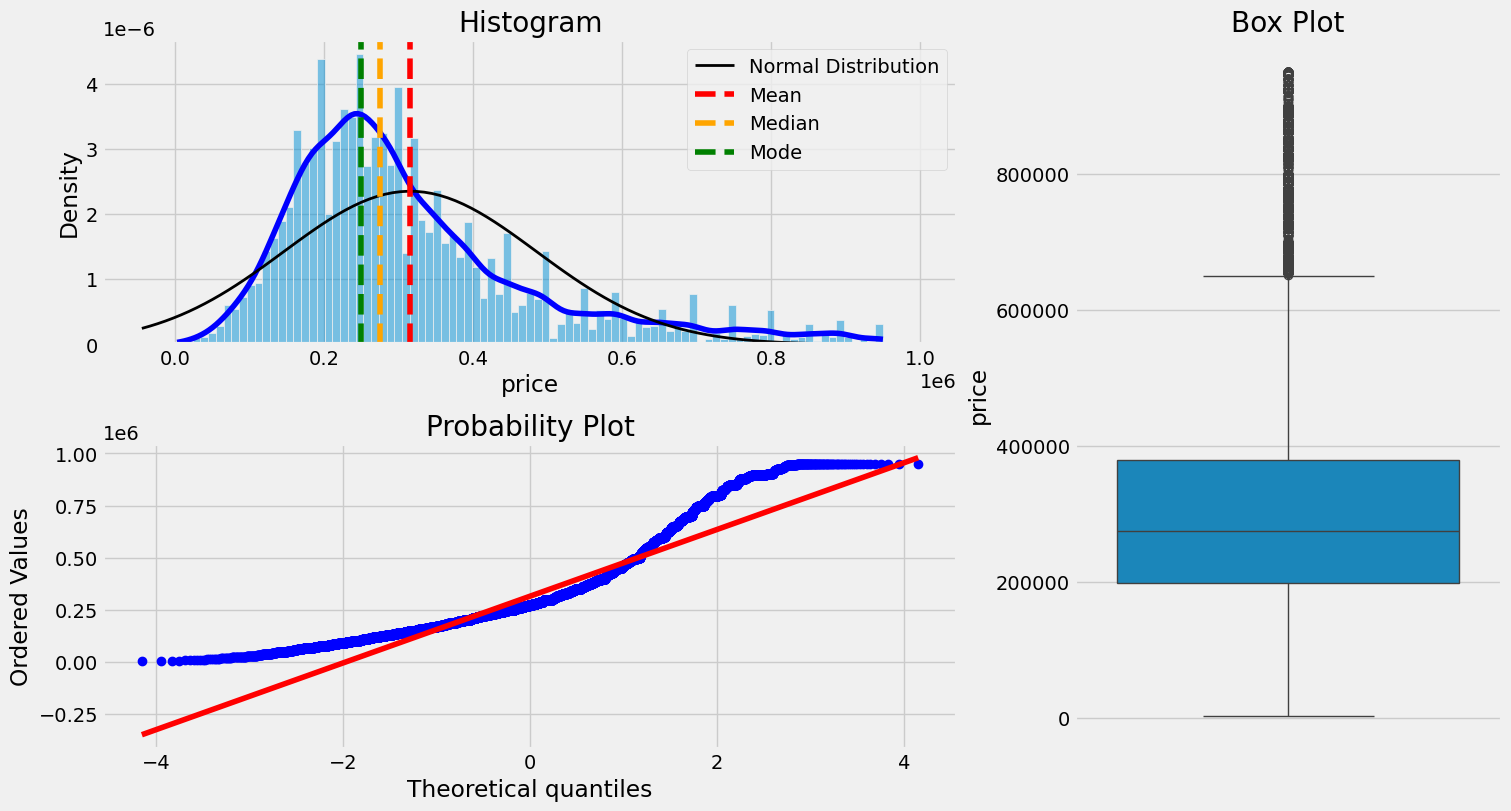

In [6]:
plotting_3_chart(df, "price")
# skewness and kurtosis
print("Skewness: %f" % df["price"].skew())
print("Kurtosis: %f" % df["price"].kurt())

mean = df["price"].mean()
median = df["price"].median()
mode = df["price"].mode()[0]

mean = round(mean)
median = round(median)
mode = round(mode)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")

Skewness and kurtosis are statistical measures that provide insights into the shape of a distribution.

* Skewness:

Skewness measures the asymmetry of a probability distribution. A skewness value of 0 indicates a perfectly symmetrical distribution.
If skewness is positive, the distribution is skewed to the right (tail on the right), indicating that the data has a longer right tail.
If skewness is negative, the distribution is skewed to the left (tail on the left), indicating that the data has a longer left tail.
In our case, a positive skewness of 1.381479 suggests that the distribution is right-skewed, meaning there is a longer right tail.

* Kurtosis:

Kurtosis measures the "tailedness" of a distribution. A kurtosis value of 3 is considered normal, called mesokurtic. If kurtosis is less than 3, the distribution is platykurtic (light-tailed), and if greater than 3, it is leptokurtic (heavy-tailed).
Positive kurtosis indicates a distribution with heavier tails and a sharper peak, while negative kurtosis indicates a distribution with lighter tails and a flatter peak.
In our case, a kurtosis value of 2.031714 suggests that the distribution is slightly heavier-tailed than a normal distribution but not extremely so. It falls within the range of a mesokurtic distribution.

<b> Observation:</b>
* Out target variable, 'price' is not normally distributed.
* Our target variable is right-skewed. In positive Skewness, the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price.
    * The majority of the houses are sold between 200 000 and 300 000 EUR.
    * Houses sold at 250 000 EUR dominate the market.
    * A house cost around 315 000 EUR in Belgium.
* There are multiple outliers in the variable, it means there are many houses that are sold over 600 000 EUR.



The reason why outliers was removed was because linear regression analysis was susceptible to outliers.
Also, linear regression analysis requires normality. Therefore, we will apply the boxcox transformation to solve these problems.

In [21]:
# Remove the outliers
index = df[(df["price"] >= 720000)].index
df.drop(index, inplace=True)

Skewness: 0.016236
Kurtosis: 0.167064
Mean: 187 - Median: 186 - Mode: 181


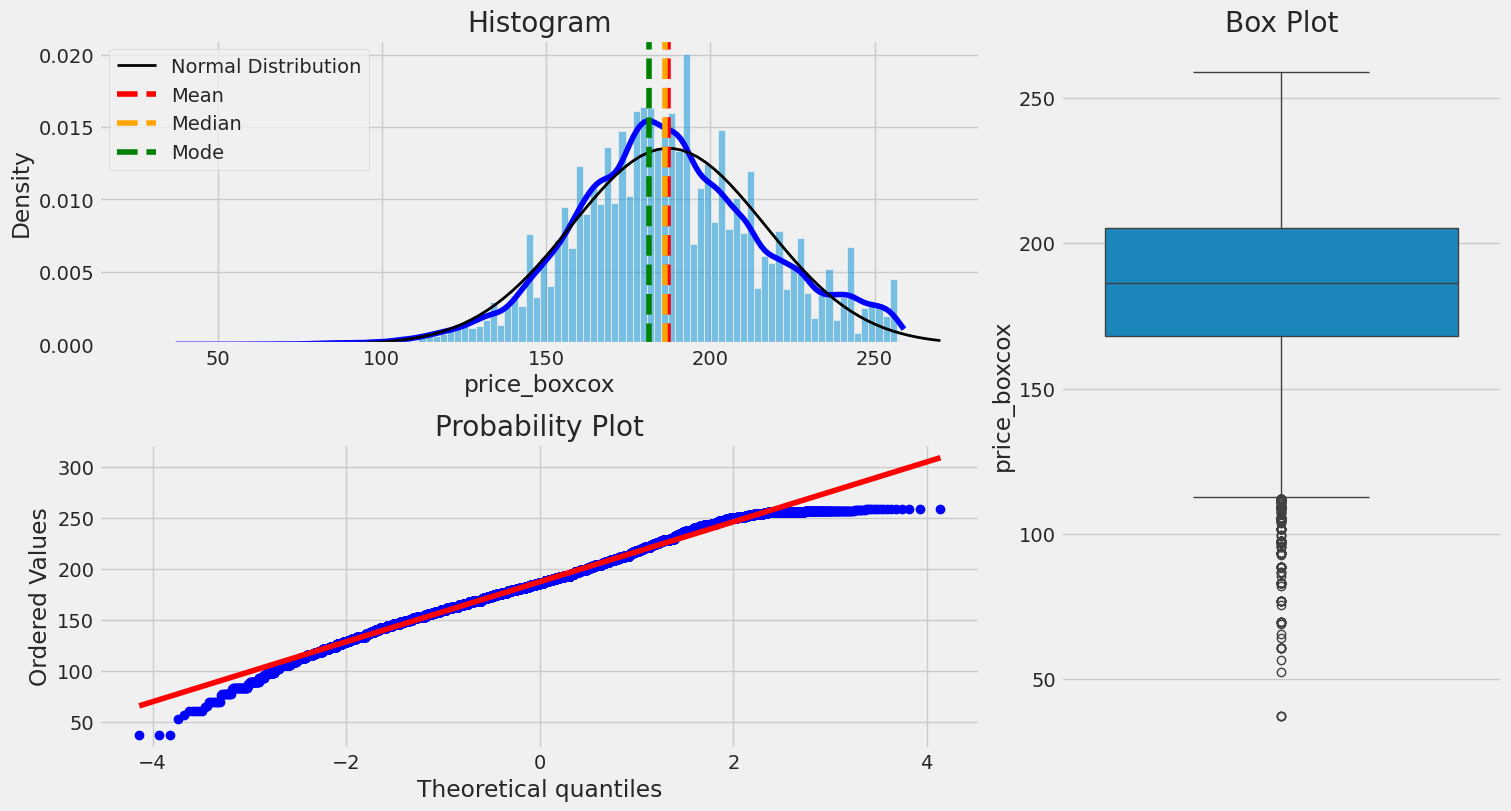

In [22]:
# Apply Boxcox operation to reduce the skrewness
df["price_boxcox"], parameters = stats.boxcox(df["price"])
plotting_3_chart(df, "price_boxcox")
# skewness and kurtosis
print("Skewness: %f" % df["price_boxcox"].skew())
print("Kurtosis: %f" % df["price_boxcox"].kurt())

mean = df["price_boxcox"].mean()
median = df["price_boxcox"].median()
mode = df["price_boxcox"].mode()[0]

mean = round(mean)
median = round(median)
mode = round(mode)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")

<a id="2.2"></a> 
### **Check correlation**

 List all the types of our data from our dataset and take only the numerical ones.


In [8]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

Creating New Features

In [10]:
price_m2 = df["price"] / df["house_area"]

df.insert(15, "price_m2", price_m2)
df.head()

,postal_code,type_of_property,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,city_name,lattitude,longitude,price_m2,price,price_boxcox
0,1050,0,6,203,1,0,1,0,95,2,0,to be done up,Ixelles,4.381571,50.822285,1674.876847,340000,39.270064
1,1050,0,4,200,0,0,0,0,69,2,0,to renovate,Ixelles,4.381571,50.822285,2600.000000,520000,42.342639
2,1050,0,4,160,1,0,1,1,100,2,0,to be done up,Ixelles,4.381571,50.822285,3743.750000,599000,43.410470
3,1050,0,3,160,1,0,1,1,130,2,0,good,Ixelles,4.381571,50.822285,3743.750000,599000,43.410470
4,1050,0,3,171,0,0,0,0,46,2,0,just renovated,Ixelles,4.381571,50.822285,3362.573099,575000,43.099360


In [12]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_numeric = df[numeric_cols]
df_numeric.head()

,postal_code,type_of_property,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,lattitude,longitude,price_m2,price,price_boxcox
0,1050,0,6,203,1,0,1,0,95,2,0,4.381571,50.822285,1674.876847,340000,39.270064
1,1050,0,4,200,0,0,0,0,69,2,0,4.381571,50.822285,2600.000000,520000,42.342639
2,1050,0,4,160,1,0,1,1,100,2,0,4.381571,50.822285,3743.750000,599000,43.410470
3,1050,0,3,160,1,0,1,1,130,2,0,4.381571,50.822285,3743.750000,599000,43.410470
4,1050,0,3,171,0,0,0,0,46,2,0,4.381571,50.822285,3362.573099,575000,43.099360


In [13]:
categorical_cols = df.select_dtypes(include=["O"]).columns
df_categorical = df[categorical_cols]
df_categorical.head()

,state_of_the_building,city_name
0,to be done up,Ixelles
1,to renovate,Ixelles
2,to be done up,Ixelles
3,good,Ixelles
4,just renovated,Ixelles


In [14]:
# sns.pairplot(
#     df
# )

In [15]:
df_numeric.corr()  # prints the correlation coefficient between every pair of attributes

,postal_code,type_of_property,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,lattitude,longitude,price_m2,price,price_boxcox
postal_code,1.000000,-0.053553,-0.025411,-0.019467,-0.098703,-0.037371,-0.091834,0.025943,-0.003820,-0.098527,-0.014534,-0.566201,0.035595,-0.057817,-0.138380,-0.144361
type_of_property,-0.053553,1.000000,-0.535560,-0.497895,-0.008350,-0.153846,0.135439,-0.344231,-0.140132,-0.391319,-0.056148,-0.160256,0.251954,0.470947,-0.126900,-0.100609
number_of_rooms,-0.025411,-0.535560,1.000000,0.686775,0.014008,0.147512,-0.008711,0.201881,0.130726,0.268715,0.081261,0.132430,-0.171530,-0.306869,0.422682,0.413178
house_area,-0.019467,-0.497895,0.686775,1.000000,-0.003476,0.177434,-0.011495,0.180600,0.165549,0.270821,0.140188,0.105435,-0.117260,-0.357877,0.530743,0.496544
fully_equipped_kitchen,-0.098703,-0.008350,0.014008,-0.003476,1.000000,0.079090,0.094053,0.079223,-0.001436,0.115950,0.029258,0.057492,-0.080698,0.002752,0.024391,0.026087
open_fire,-0.037371,-0.153846,0.147512,0.177434,0.079090,1.000000,0.037739,0.166674,0.059218,0.163180,0.091631,0.042005,-0.063779,-0.046026,0.173898,0.154874
terrace,-0.091834,0.135439,-0.008711,-0.011495,0.094053,0.037739,1.000000,0.063890,-0.002237,0.004123,0.048803,0.039998,-0.004298,0.104520,0.123618,0.151540
garden,0.025943,-0.344231,0.201881,0.180600,0.079223,0.166674,0.063890,1.000000,0.058195,0.135466,0.052319,0.035157,-0.063140,-0.130005,0.111557,0.118994
surface_of_the_land,-0.003820,-0.140132,0.130726,0.165549,-0.001436,0.059218,-0.002237,0.058195,1.000000,0.105869,0.055791,0.053256,-0.059345,-0.039719,0.145319,0.123966
number_of_facades,-0.098527,-0.391319,0.268715,0.270821,0.115950,0.163180,0.004123,0.135466,0.105869,1.000000,0.085376,0.222991,-0.204468,-0.199572,0.132922,0.118378


Feature to feature relationship

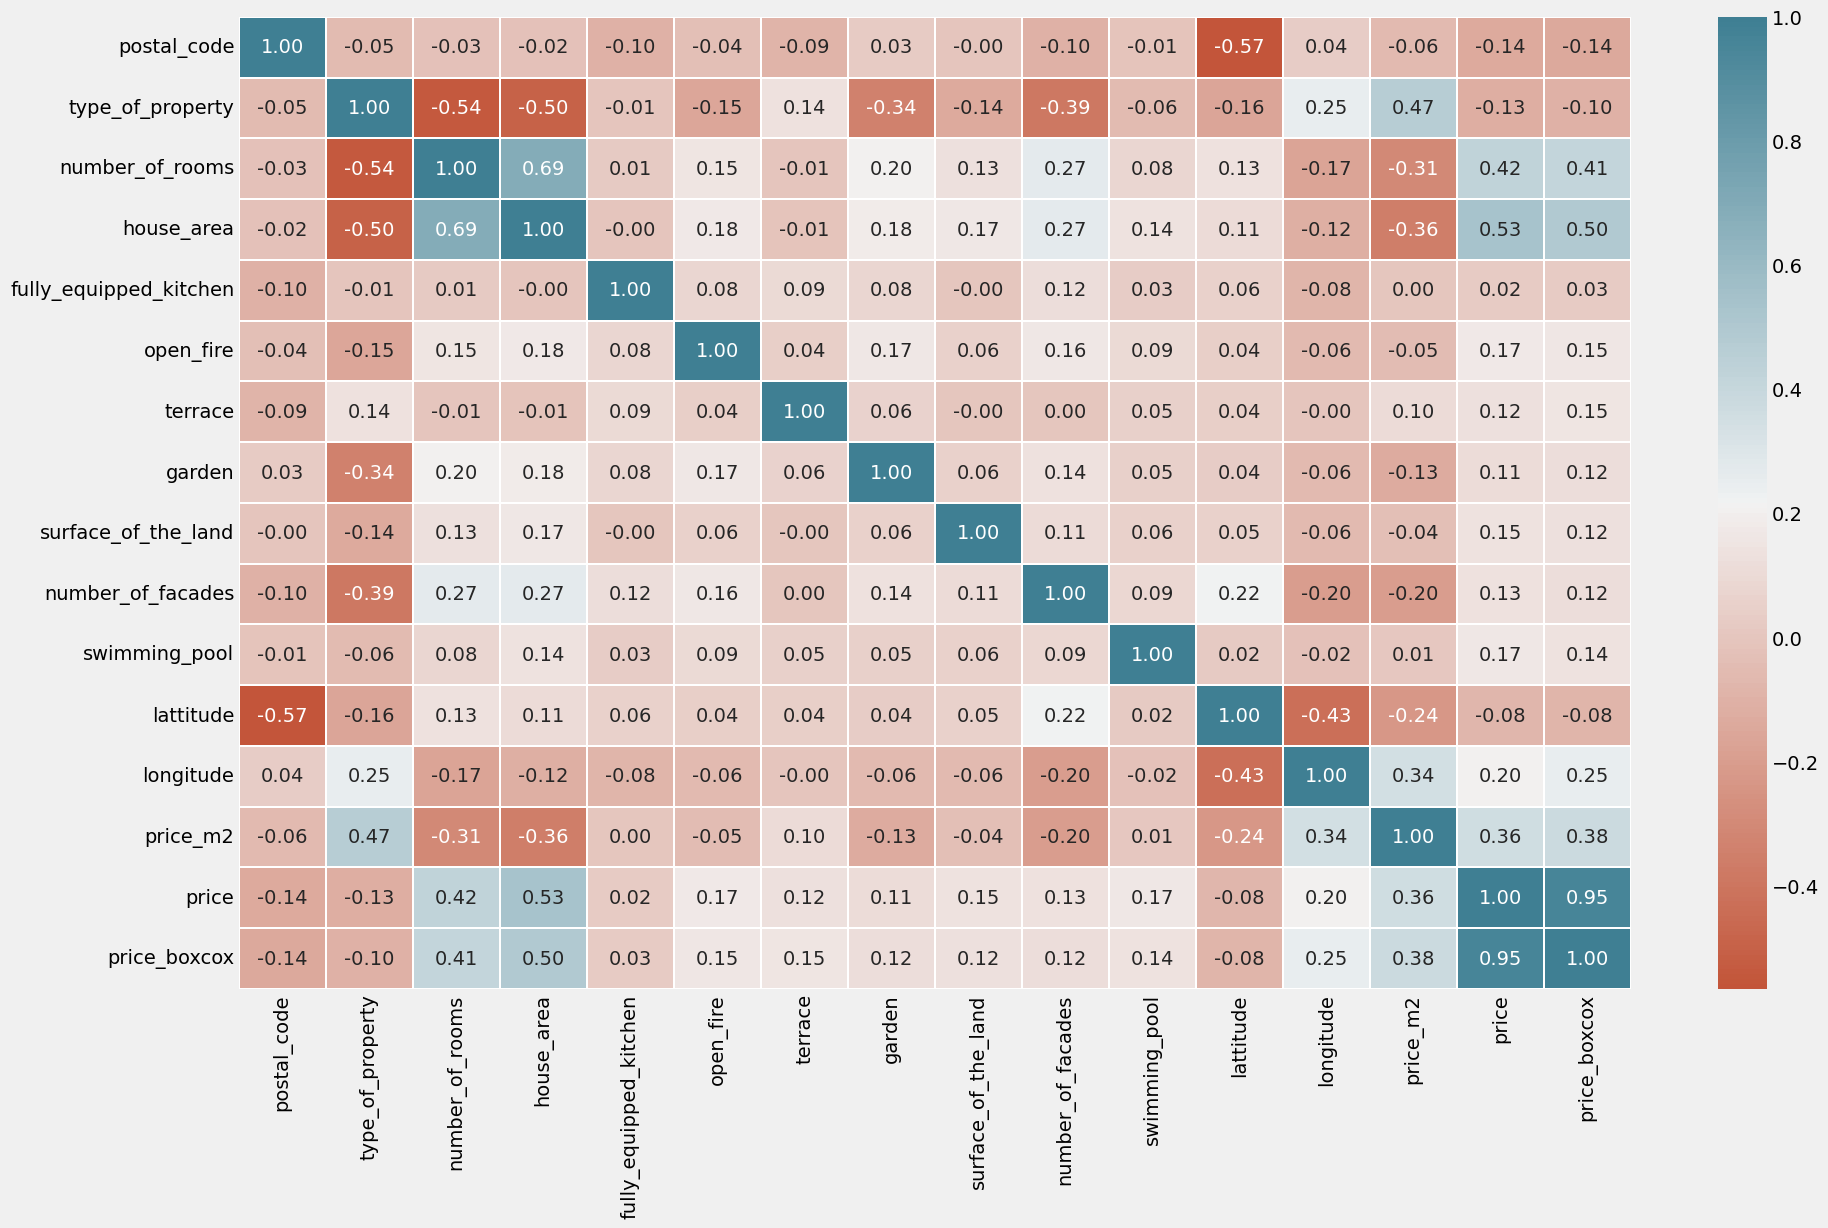

In [16]:
# Create the correlation heatmap
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(
    df_numeric.corr(),
    ax=ax,
    annot=True,
    linewidths=0.05,
    fmt=".2f",
    cmap=sns.diverging_palette(20, 220, n=200),
)
plt.show()

<b> Observation: </b>

Main correlation

* "number_of_rooms" and "house_area" have strongest correlation with the "price" attribute.
* "number_of_rooms" and "house_area" are also highly correlated. High correlation between independent variables is not good because it causes multicollinearity.

Other correlations:

* The "swimming pool" and "open_fire" attributes seem to have a small correlation with the "price".
* There is a correlation between "number_of_facades", "number_of_rooms" and "house_area" attributes.

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Analysis**

We have two type of property: apartment and house (hous:0 and apartment:1). So we will analyze each attribute with "type_of_property" attribute. 

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Analysis**